# Part 2

### Step 1 - import libraries and data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 4/Instacart Basket Analysis'

In [3]:
# importing most recently updated and merged dataframe
df_instacart = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_merged.pkl'))

In [4]:
#checking dataframe
df_instacart.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


### Step 2 - Create a bar chart, histogram, scatterplot, and line chart using a sample subset.

Text(0.5, 0, 'Day of the Week')

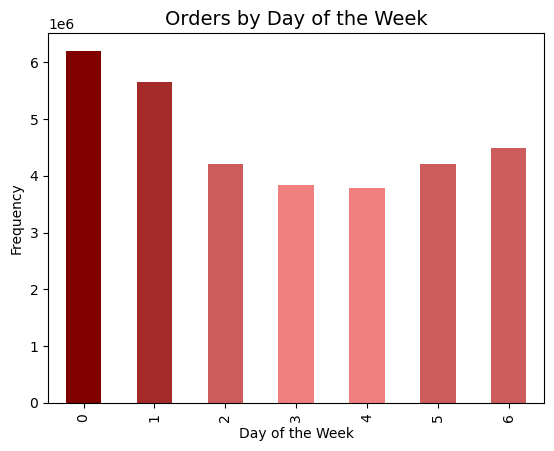

In [5]:
# creating bar chart
bar = df_instacart['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['maroon', 'brown', 'indianred', 'lightcoral', 'lightcoral', 'indianred', 'indianred'])
plt.title('Orders by Day of the Week', fontsize=14)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Day of the Week', fontsize=10)

In [6]:
# exporting bar chart
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

Text(0, 0.5, 'Frequency')

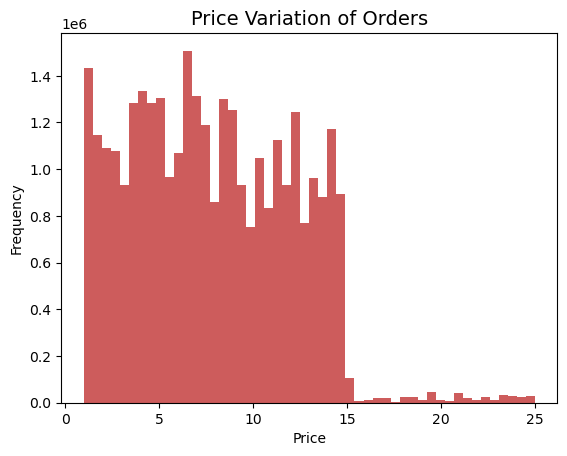

In [7]:
# creating histogram
hist = df_instacart['prices'].plot.hist(bins = 50, color = 'indianred')
plt.title('Price Variation of Orders', fontsize=14)
plt.xlabel('Price (USD)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks

In [8]:
# exporting histogram
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_prices.png'))

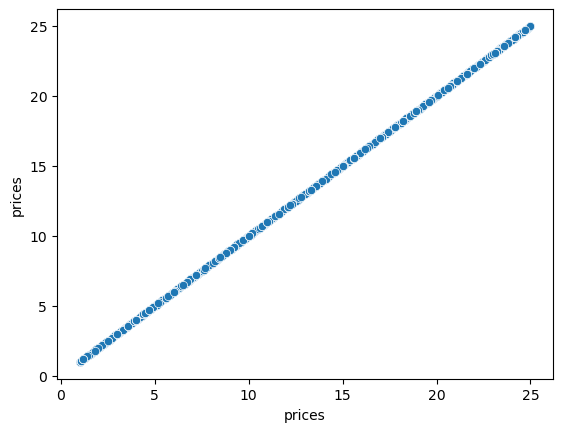

In [11]:
# creating a scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices', data = df_instacart)

In [12]:
# exporting scatterplot
scatterplot.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot_prices.png'))

In [13]:
# creating a list holding true/false values to test the random numbers
np.random.seed(4)
dev = np.random.rand(len(df_instacart)) <= 0.7

In [14]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
np.random.rand(15)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402,
       0.0164016 , 0.99588525, 0.68895442, 0.9491469 , 0.63012328])

In [16]:
# creating a sample to store 70% from df_instacart 
big = df_instacart[dev]

In [17]:
# creating a sample to store 30% from df_instacart
small = df_instacart[~dev]

In [18]:
# checking the length of samples
len(df_instacart)

32404859

In [19]:
len(big) + len(small)

32404859

In [20]:
# creating a smaller dataframe using only the data needed for the upcoming line chart
df_2 = small[['order_day_of_week', 'prices']]

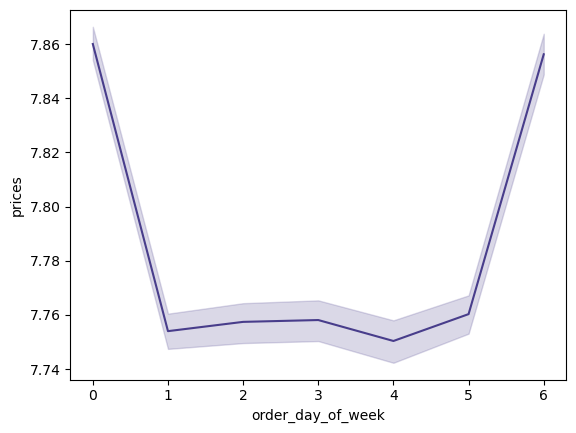

In [22]:
# creating line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices', color = 'darkslateblue')

In [23]:
# exporting line chart
line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'linechart_prices.png'))

### Step 3 - Create a histogram of the order_hour_of_day column

Text(0, 0.5, 'Frequency')

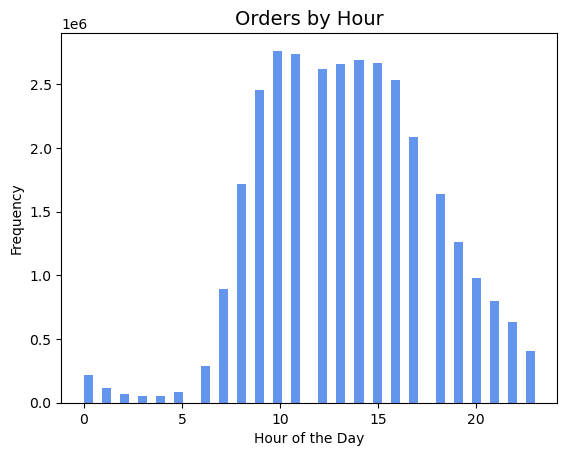

In [29]:
# creating a histogram for the 'order_hour_of_day' column
hist_hour = df_instacart['order_hour_of_day'].plot.hist(bins = 50, color = 'cornflowerblue')
plt.title('Orders by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

In [30]:
# exporting histogram chart
hist_hour.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_orders_24hour.png'))

Observations: This histogram shows the amount of orders per hour, with orders peaking about 10 am and beginning to drop off after 3pm. 

### Step 4 - Create a bar chart from the 'loyalty_flag' column

Text(0.5, 1.0, 'Customer Types')

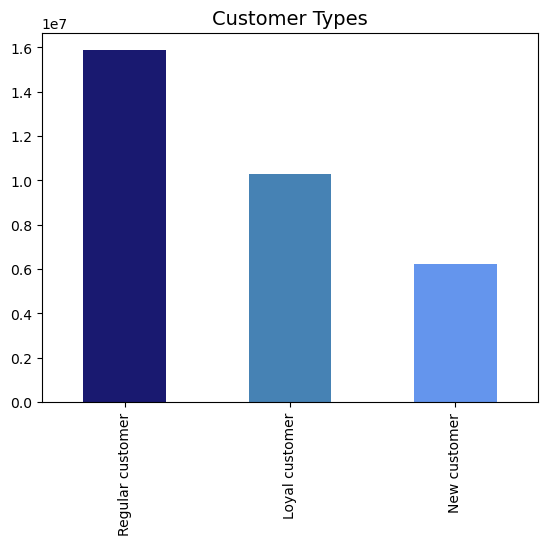

In [35]:
loyalty_chart = df_instacart['loyalty_flag'].value_counts().plot.bar(color = ['midnightblue', 'steelblue', 'cornflowerblue'])
plt.title('Customer Types', fontsize=14)

In [36]:
# exporting loyalty_chart
loyalty_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_chart.png'))

### Step 5 - Checking expenditures

Note: samples have already been created in the big and small variables for the previous line chart

In [37]:
# creating a smaller dataframe using only the data needed for the upcoming line chart
df_3 = small[['order_hour_of_day', 'prices']]

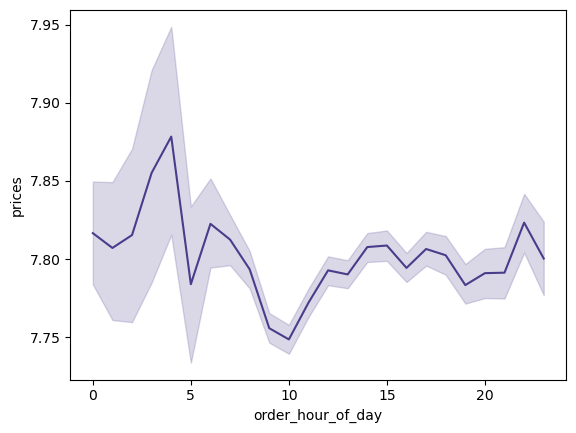

In [39]:
# creating line chart
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices', color = 'darkslateblue')

In [40]:
# exporting line chart
line_hour.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'linechart_hour.png'))

### Step 6 - Create a line chart examining the relation between age and number of dependants

In [41]:
# creating a subset of the data needed for this line chart
df_4 = small[['age', 'number_of_dependants']]

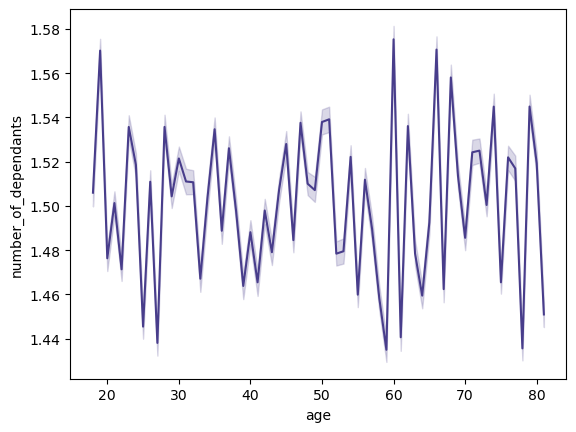

In [42]:
# creating line chart
line_age_dependants = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants', color = 'darkslateblue')

Observation: There is a lot of variation throughout all the years, with the highest peaks around age 20, 60, and 65. I am unsure how to make the number of dependants be a whole number however, and this chart should probably be updated once I figure out how.

In [44]:
# exporting line chart
line_age_dependants.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'linechart_dependants.png'))

### Step 7 - Create a scatterplot exploring the relation between age and income

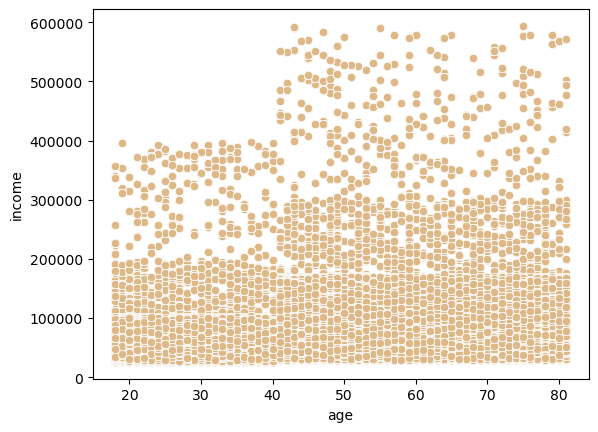

In [45]:
# creating a scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_instacart, color = 'burlywood')

Observation: This chart shows that the higher up in age a customer is the more income or spending power they have. There is a solid base of spending that is about 100,000 for those 40 and under, and about 180,000 for those over 40, and the higher variances follow this trend. This aligns with much of the economy's wealth being held by older generations.

In [46]:
# exporting scatterplot
scatter_age_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatter_age_income.png'))